# About Prophet
Link to paper: https://peerj.com/preprints/3190.pdf

In [13]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/xiaomiaoright/TimeSeriesProjects/master/Dataset/BeerWineLiquor.csv')

In [11]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


## Format the Data to Prophet style

In [12]:
df.columns =['ds','y']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      324 non-null    object
 1   y       324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [16]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


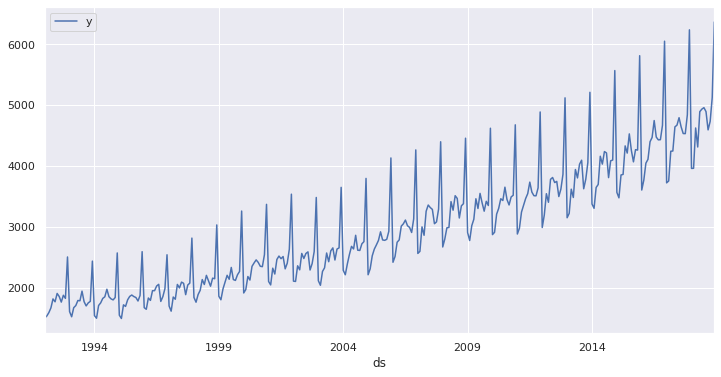

In [18]:
df.plot(x='ds', y='y', figsize=(12,6))

## Create Time Series Model with Prophet

In [19]:
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Model predictions


*   Create future place holder dataframe
*   Predict and fill in future
*   Plot 





In [21]:
future = model.make_future_dataframe(periods=24,freq = 'MS')

In [27]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [23]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [25]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      348 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 KB


In [28]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1149.794534,1477.975164,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1188.841696,1505.940340,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1438.873899,1742.552145,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1417.793668,1740.641350,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1665.564636,1983.515298,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516


In [29]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5201.232291,5080.954475,5404.921029,5190.481326,5212.788375,39.473660,39.473660,39.473660,39.473660,39.473660,39.473660,0.0,0.0,0.0,5240.705951
344,2020-09-01,5217.295945,4914.242747,5248.518469,5205.486251,5229.800529,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,0.0,0.0,0.0,5083.568322
345,2020-10-01,5232.841416,5030.508381,5352.171613,5219.680437,5246.150337,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,0.0,0.0,0.0,5189.273100
346,2020-11-01,5248.905070,5177.108228,5505.511969,5234.764836,5263.068042,87.524399,87.524399,87.524399,87.524399,87.524399,87.524399,0.0,0.0,0.0,5336.429469
347,2020-12-01,5264.450542,6172.307621,6500.276056,5249.266881,5279.546145,1070.542133,1070.542133,1070.542133,1070.542133,1070.542133,1070.542133,0.0,0.0,0.0,6334.992675


In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
324,2019-01-01,4445.016879,4288.360911,4599.998089
325,2019-02-01,4469.777291,4301.275964,4627.951255
326,2019-03-01,4709.381512,4544.760618,4870.254634
327,2019-04-01,4732.698396,4555.895504,4885.987591
328,2019-05-01,5004.316240,4841.716114,5159.620037
329,2019-06-01,4994.033881,4831.132008,5164.365619
330,2019-07-01,5140.185692,4981.935777,5299.861573
331,2019-08-01,5048.205515,4878.684709,5215.490754
332,2019-09-01,4908.033980,4738.496958,5064.574360
333,2019-10-01,4989.311789,4824.060613,5151.954547


(735234.0, 737760.0)

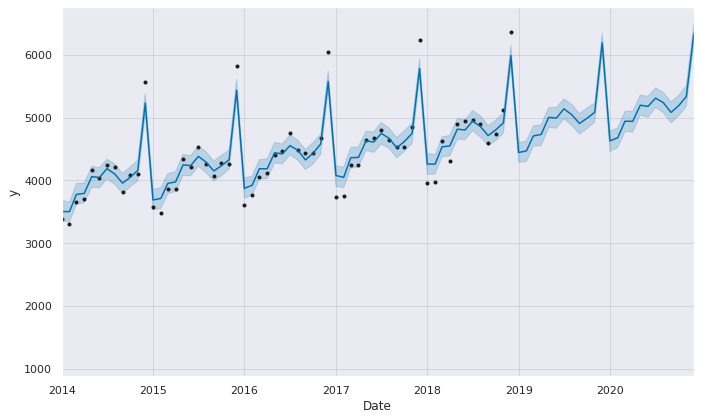

In [63]:
# ax = plt.Figure(figsize=(12,6))
model.plot(forecast)
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2020-12-01'))

In [ ]:
# ax = plt.Figure(figsize=(12,6))
model.plot_com(forecast)
plt.xlabel('Date')
# plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2020-12-01'))